In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('perfume_sales_dataset.csv')
df.head()

,Order No.,Date,Perfume Article No.,Perfume Name,Quantity,Original Price,Discount,After Discount Amount,Total Amount,Customer Age,Customer Gender,Customer Location,Customer Number
0,1000,08/07/2023,P953,Floral Elegance,1,125,5,120,120,59,Female,Colemouth,C6391
1,1001,09/07/2023,P446,Patchouli Passion,2,94,10,84,168,58,Male,Mortonborough,C7640
2,1002,10/07/2023,P241,Amber Romance,2,113,10,103,206,30,Female,West Brianburgh,C8092
3,1003,11/07/2023,P807,Patchouli Passion,1,146,0,146,146,41,Male,Williamschester,C1962
4,1004,12/07/2023,P444,Rose Petals,2,53,15,38,76,32,Female,New Diana,C3654


In [3]:
df.describe()

,Order No.,Quantity,Original Price,Discount,After Discount Amount,Total Amount,Customer Age
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,1037.307692,1.897436,95.961538,8.141026,87.820513,169.346154,40.858974
std,22.380597,0.748847,32.422712,7.733759,33.367588,102.969524,14.510833
min,1000.000000,1.000000,40.000000,0.000000,20.000000,27.000000,18.000000
25%,1018.000000,1.000000,70.000000,0.000000,62.250000,91.250000,28.250000
50%,1036.500000,2.000000,100.000000,7.500000,91.500000,157.000000,41.000000
75%,1057.000000,2.000000,116.750000,15.000000,107.500000,233.250000,49.750000
max,1077.000000,3.000000,150.000000,20.000000,149.000000,447.000000,70.000000


**Observations:**<br>
We have 78 observations in the data<br>
Average price of a perfume is 95.97<br>
Average Discount given is 8.14<br>
Average Order Amount is 169.34<br>
Average age of a customer is 40.86<br>

In [65]:
df.columns

Index(['Order No.', 'Date', 'Perfume Article No.', 'Perfume Name', 'Quantity',
       'Original Price', 'Discount', 'After Discount Amount', 'Total Amount',
       'Customer Age', 'Customer Gender', 'Customer Location',
       'Customer Number'],
      dtype='object')

In [19]:
#Categorical Features
df.dtypes[df.dtypes == 'object']

Date                   object
Perfume Article No.    object
Perfume Name           object
Customer Gender        object
Customer Location      object
Customer Number        object
dtype: object

**Hypothesis for Categorical Features**<br>
Which Perfume was the best seller?-- Who bought those perfumes?<br>
Which Gender is has bought the most? -- Ages of that Gender?<br>
How many customers are returning? -- Customers returning and their stats e.g Gender and Location<br>

In [64]:
df.groupby('Perfume Name').sum().sort_values(by='Quantity', ascending=False)['Quantity'].reset_index()

,Perfume Name,Quantity
0,Musk Magic,13
1,Jasmine Whisper,12
2,Citrus Zest,11
3,Woodland Fantasy,10
4,Spiced Citrus,9
5,Rose Petals,8
6,Amber Romance,8
7,Floral Elegance,8
8,Eau de Blossom,8
9,Mystic Musk,8


***Categorical Analysis***

In [38]:
df.groupby('Perfume Name').agg(
    Orders = ('Order No.', 'count'),
    Quantity=('Quantity', 'sum'),
    Original_Price_Mean=('Original Price', 'mean'),
    Discount_Mean=('Discount', 'mean'),
    After_Discount_Amount_Mean=('After Discount Amount', 'mean'),
    Total_Amount_Mean=('Total Amount', 'mean'),
    Customer_Age_Mean=('Customer Age', 'mean')
).sort_values(by='Quantity', ascending=False).reset_index()

,Perfume Name,Orders,Quantity,Original_Price_Mean,Discount_Mean,After_Discount_Amount_Mean,Total_Amount_Mean,Customer_Age_Mean
0,Musk Magic,6,13,115.000000,9.166667,105.833333,239.000000,42.000000
1,Jasmine Whisper,5,12,90.000000,8.000000,82.000000,211.600000,46.000000
2,Citrus Zest,6,11,95.333333,5.833333,89.500000,159.333333,31.333333
3,Woodland Fantasy,5,10,108.400000,3.000000,105.400000,221.600000,32.600000
4,Spiced Citrus,5,9,89.600000,2.000000,87.600000,144.000000,39.600000
5,Rose Petals,5,8,95.400000,10.000000,85.400000,130.400000,41.200000
6,Amber Romance,4,8,90.250000,8.750000,81.500000,189.750000,29.750000
7,Floral Elegance,5,8,102.000000,12.000000,90.000000,151.400000,46.400000
8,Eau de Blossom,4,8,113.750000,10.000000,103.750000,199.250000,44.750000
9,Mystic Musk,4,8,95.500000,10.000000,85.500000,176.500000,33.000000


In [40]:
df[['Perfume Name', 'Original Price']].sort_values(by='Original Price', ascending=False).head(5)

,Perfume Name,Original Price
20,Oud Opulence,150
37,Mystic Musk,149
74,Cedarwood Bliss,149
76,Mystic Musk,147
3,Patchouli Passion,146


In [55]:
df.groupby('Customer Gender').agg( 
Average_Age = ('Customer Age','mean'),
Total_Spend= ('After Discount Amount','sum'),
Average_Spend = ('After Discount Amount','mean'),
Quantity = ('Quantity','sum'),
Orders = ('Order No.','count'),
).sort_values(by='Total_Spend',ascending=False).reset_index()

,Customer Gender,Average_Age,Total_Spend,Average_Spend,Quantity,Orders
0,Female,38.850000,3466,86.650000,75,40
1,Male,42.973684,3384,89.052632,73,38


In [ ]:
df['Customer Number'].value_counts().sort_values(ascending=False).head(10)

C6391    1
C6846    1
C1962    1
C3654    1
C2498    1
C7485    1
C5589    1
C3488    1
C3349    1
C1844    1
Name: Customer Number, dtype: int64

**Observation:**<br>
Price doesn't matter. Least sold perfume is priced at an average of 69. Most sold is priced at 115. <br>
Female tend to spend less on average while cummulative purchasing is more than Male which increases the Total Spend<br>
Average ages of both genders are high. Which means there are less number of young customers.<br>
There are no returning customers.<br>
We need to check correlation for Price and Age<br>

***Numerical Analysis***

<AxesSubplot:>

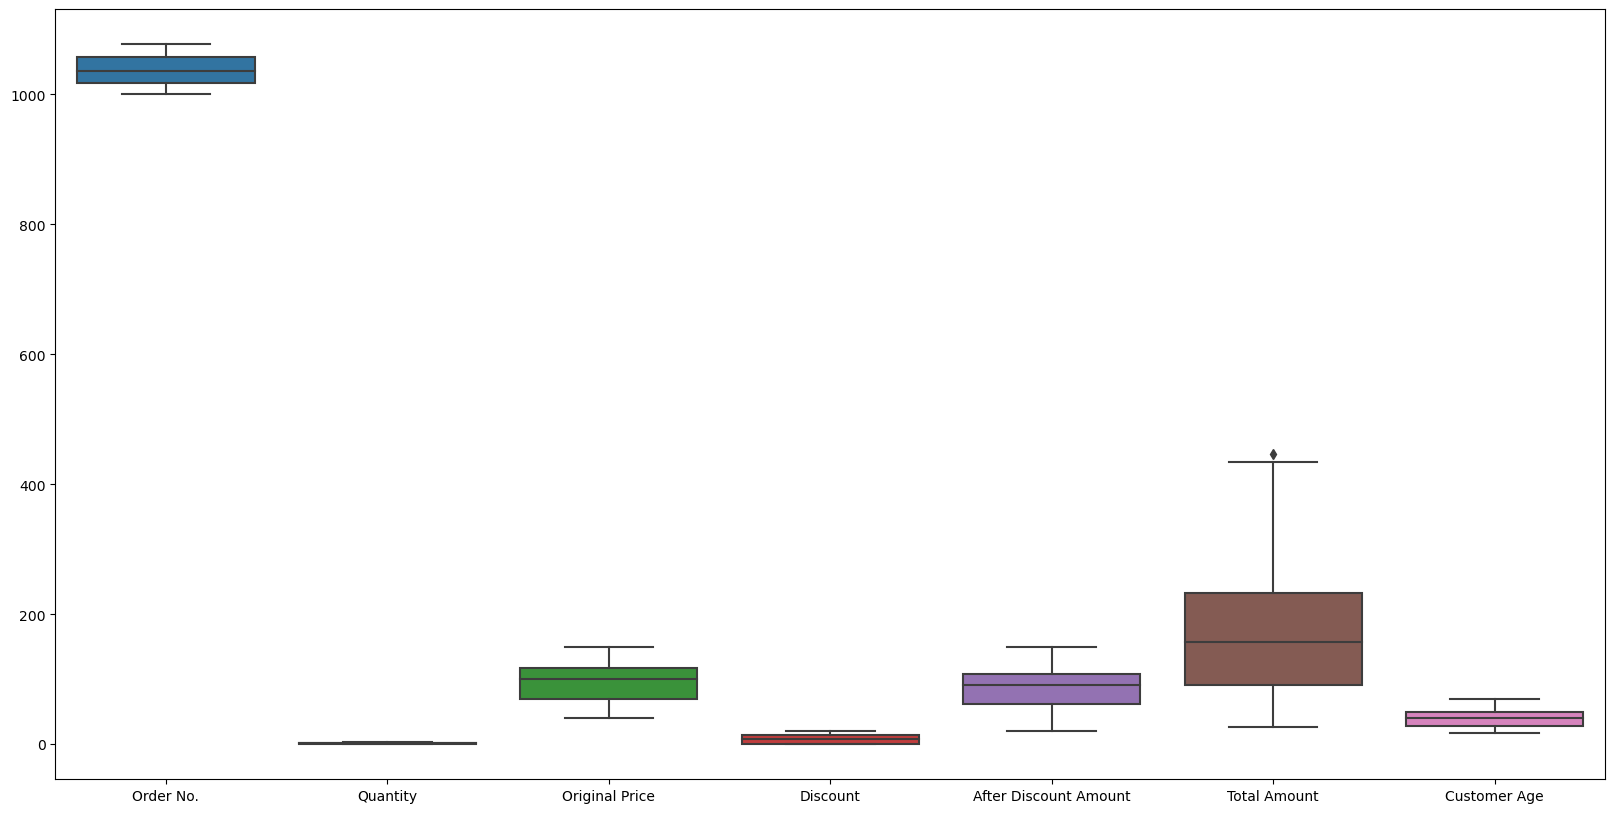

In [62]:
fig,ax=plt.subplots(figsize=(20,10))
fig = sns.boxplot(data=df)
fig

In [94]:
df.corr()

,Order No.,Quantity,Original Price,Discount,After Discount Amount,Total Amount,Customer Age
Order No.,1.000000,-0.056210,0.030066,-0.175229,0.069828,0.022529,-0.031976
Quantity,-0.056210,1.000000,0.089162,-0.100623,0.109960,0.727558,0.063190
Original Price,0.030066,0.089162,1.000000,-0.004691,0.972770,0.688879,-0.050830
Discount,-0.175229,-0.100623,-0.004691,1.000000,-0.236333,-0.209641,0.064175
After Discount Amount,0.069828,0.109960,0.972770,-0.236333,1.000000,0.717961,-0.064265
Total Amount,0.022529,0.727558,0.688879,-0.209641,0.717961,1.000000,-0.039575
Customer Age,-0.031976,0.063190,-0.050830,0.064175,-0.064265,-0.039575,1.000000


**Observations:**<br>
Quantity tends to increase with Customer age.<br>
Customer with lower age buy perfumes with higher prices as customers with higher age go for discounted items. 


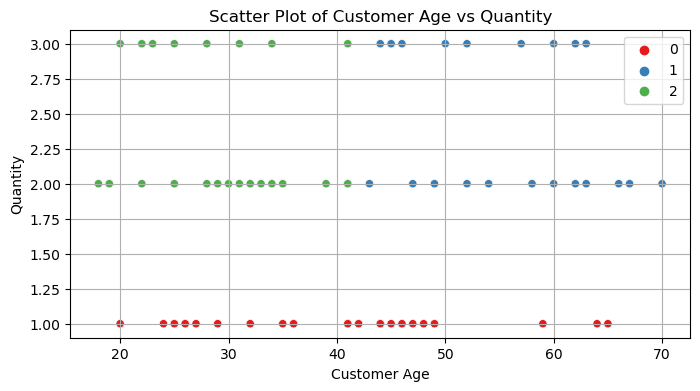

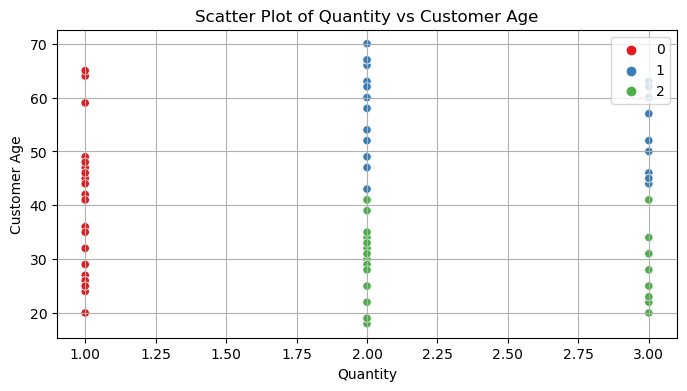

In [87]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
data = pd.read_csv('perfume_sales_dataset.csv')

# Select features for clustering
features = ['Customer Age', 'Quantity']
X = data[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
num_clusters = 3

# Apply K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Create separate scatter plots using seaborn
for feature_x in features:
    for feature_y in features:
        if feature_x != feature_y:
            plt.figure(figsize=(8,4))
            sns.scatterplot(data=data, x=feature_x, y=feature_y, hue='Cluster', palette='Set1')
            plt.xlabel(feature_x)
            plt.ylabel(feature_y)
            plt.title(f'Scatter Plot of {feature_x} vs {feature_y}')
            plt.legend()
            plt.grid(True)
            plt.show()

In [88]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Calculate Davies-Bouldin index
davies_bouldin_avg = davies_bouldin_score(X_scaled, data['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')


Silhouette Score: 0.45651322951331963
Davies-Bouldin Index: 0.821174423666121


***SS greater than 0.4 tell reasonable seperation b/w cluster***<br>
***DB Index 0.82 less 1 indicates good seperation b/w clusters*** 

<AxesSubplot:xlabel='Quantity', ylabel='Customer Age'>

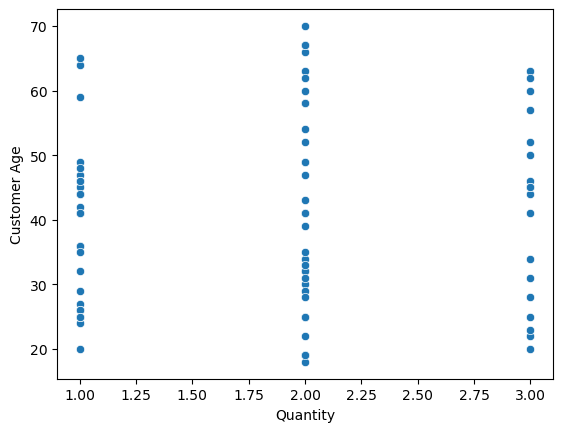

In [96]:
sns.scatterplot(y='Customer Age', x='Quantity', data=df)

<AxesSubplot:xlabel='Customer Age', ylabel='Quantity'>

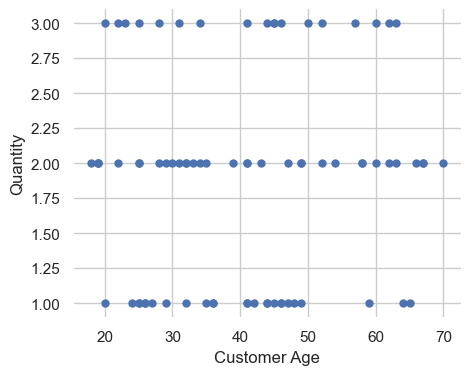

In [104]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(5,4))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="Customer Age", y="Quantity",
                palette="ch:r=-.2,d=.3_r", linewidth=0,
                data=df, ax=ax)

In [117]:
total_spending = df.groupby('Customer Gender').sum()['Total Amount'].reset_index()

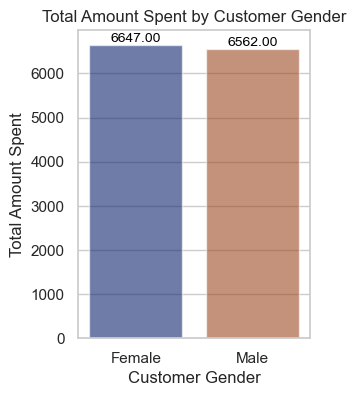

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
# Set the figure size to 5x4
plt.figure(figsize=(3,4))
# Draw a nested barplot by customer gender and total amount spent
sns.despine(left=True, bottom=True)
# Use the correct function name "sns.barplot" instead of "sns.catplot"
g = sns.barplot(
    data=total_spending, x='Customer Gender', y="Total Amount",
    palette="dark", alpha=.6
)
# Annotate each bar with the respective value
for p in g.patches:
    height = p.get_height()
    g.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
               ha='center', va='bottom', fontsize=10, color='black')
# Adjust axis labels and title
g.set(xlabel="Customer Gender", ylabel="Total Amount Spent")
plt.title("Total Amount Spent by Customer Gender")
# Show the plot
plt.show()
